# Linear Model Selection / Regularization

Why might we want to use another fitting procedure instead of least squares?

 * prediction accuracy:
 
   if $n>>p$ OLS has lowest variance
   
   if $n>p$  there is no longer a unique LS-coefficient, hence high variance
   
 * model interpretability:
 
   some coeffitient/ variables might not be associated with the response $\Rightarrow$ irrelevant variables

**Solution:**
 - constraining/ shrinking
   
   shrinking the coefficients twowards zero - can significantly reduce variance (good for prediction)
 
 - feature/ variable selection
   
   identifying a subset of the $p$ predictors that believed to be related to the response
 
**Methods:**

 1. Subset Selection: $C_p$, AIC, BIC, adjusted $R^2$
 
 2. Shrinkage/ Regularization: Ridge Regression, Lasso
 
 3. Principal Components Regression/ Analysis (PCA)

## The Ridge Regression

Ridge Regression is used for prediction

$$ \beta_{OLS}= argmin \sum_{i=1}^n (y_i-x_i'\beta)^2 $$

**Problem:**
 * adding additional covariates to the model has little/ no costs even if they are uninformative
 
 * adding groups of highly correlated covariates leads to insignificant results
 
**Idea:**
penalize the loss function 

$$ \beta_{R}= argmin \sum_{i=1}^n (y_i-x_i'\beta)^2 \quad s.th. \sum_{j=1}^p \beta_j^2 \leq s $$


$$ \beta_{R}= argmin  \sum_{i=1}^n (y_i-x_i'\beta)^2 + \lambda \sum_{j=1}^p \beta_j^2 $$

Note: there is a one-to-one mapping between $\lambda$ and $s$

Ridge penalty:

 - if $\lambda \rightarrow \infty$, then $b_j(\lambda)\rightarrow 0$
 
 - if $\lambda \rightarrow 0$, then $b_j(\lambda)\rightarrow b_{OLS}$
 
**Note:**

 * if $\lambda$ increases, then we have more bias and less variance
 
 * Ridge Regression is useful for prediction, but not for model selection
 
 * Ridge Regression Solution $\mid\hat{\beta}_R\mid < \mid\hat{\beta}_{OLS}\mid$
 
 * $\hat{\beta}_R$ is allways biased twowards zero! 
 
 * the difference between $\mid\hat{\beta}_R\mid$ and $\mid\hat{\beta}_{OLS}\mid$ increases in $\lambda$

## The Lasso

Least Absolute Shrinkage and Selection Operator

The same Idea as for the Ridge regression, but different penalty (in this case instead of squaring, now absolute values)

Probem of Ridge: unlike subset selection, Ridge will allways include all $p$ predictors (since $\beta^2\neq 0$)

Lasso is able to do so:

$$ \beta_{L}= argmin \sum_{i=1}^n (y_i-x_i'\beta)^2 \quad s.th. \sum_{j=1}^p \mid\beta_j\mid \leq s $$


$$ \beta_{L}= argmin  \sum_{i=1}^n (y_i-x_i'\beta)^2 + \lambda \sum_{j=1}^p \mid\beta_j\mid $$

Since absolute values are not differentiable, there exists **no analytical solution**!

Shrinkage performed by the Lasso is known as soft thresholding.

### How to choose $\lambda$?

 * $s \uparrow$ free up more parameters
 
 * $s \downarrow$ restrict parameters leading to sparser and more interpretable models
 
**Procedure:**
 1. apply Lasso to training data for different $s / \lambda$
 
 2. use fitted models to predict responses $\Rightarrow$ calculate test error rate for each $\lambda$
 
 3. repeat this $k$ times (k-Fold CV)

## Principal Components Analysis

**Idea:**
transform predictors and then fit a least squares model using the transformed variables

A nice video tutorial on youtube see [here](https://www.youtube.com/watch?v=ZqXnPcyIAL8)

Lets first find any linear combination s.th.

$$ Z_m = \sum_{j=1}^p \phi_{jm} X_j \quad M<p$$
consider a linear model
$$ y_i = \theta_0 + \sum_{m=1}^M \theta_m Z_{im} + \epsilon_i $$
Thus we have:
$$ \beta_j = \sum_{m=1}^M \theta_m \phi_{jm} $$

Note: selecting value $M<<p$ can significantly reduce the variance of the fitted coefficients!

 - $\phi_{jm}$ are refered as eigenvectors
 
 - $Var(Z_m) = \lambda_m$ are refered as eigenvalues $(X_j-\lambda_m I)\phi_{jm}=0$

**Procedure:**
 1. generate transformed $Z_1,Z_2,\dots,Z_M$
 
 2. fit model using these $M$ predictors
 
Methods for Dimension Reduction:
 * Principal Component Analysis
 
 * Partial Least Squares
 
PCA is a technique for reducing the dimension of a $n\times p$ data matrix 

$\Rightarrow$ **first PC along where observations vary most**

PCA is **not** a selection method! If we have a lot regressors that allready explain $Y$, PCA performes better.

Note: 
 - Dimension Reduction methods do not change the relative distance between observations, they just truncate the data (e.g. from two dimension into one dimension)
 
 - before performing PCR, all variables should be standardized (otherwise high variance variables would play larger role)

If we expect sparsity, then Lasso/ Ridge can be better since Lasso sets some coefficients to zero.

## Simple example to descirbe the shrinkage

suppose $n=p$ and $X=I$ is an identity matrix

**Ridge**
$$
\sum_{j=1}^p (y_j-\beta_j)^2 + \lambda \sum_{j=1}^p \beta_j^2 \\
\frac{\partial}{\partial \beta}=-2(y_j-\beta_j) + 2\lambda \beta_j = 0\\
\hat{\beta}_R=\frac{y_j}{1+\lambda}
$$

the shrinkage factor is $\frac{1}{1+\lambda}$, thus $\mid \hat{\beta}_R \mid < \mid \hat{\beta}_{OLS} \mid$.
Hence, Ridge shrinks every coefficient by the same proportion!

**Lasso**
$$
\sum_{j=1}^p (y_j-\beta_j)^2 + \lambda \sum_{j=1}^p \mid\beta_j\mid \\
\frac{\partial}{\partial \beta}=-2(y_j-\beta_j) + \lambda \mid\beta_j\mid = 0\\
\hat{\beta}_L=
\begin{cases}
y_j - \frac{\lambda}{2} \quad , y>\frac{\lambda}{2}\\
y_j + \frac{\lambda}{2} \quad , y<-\frac{\lambda}{2}\\
0 \qquad, -\frac{\lambda}{2} \leq y \leq \frac{\lambda}{2}
\end{cases}
$$

some of the coefficients are shrunken to zero, thus $\mid \hat{\beta}_L \mid < \mid \hat{\beta}_{OLS} \mid$.
Hence, Lasso shrinkage depends (see figure below)!

![](shrinkage.png "shrinkage of Ridge and Lasso")

## Exercises

Consider the following data generating process in which $n$ observations and $p$ covariates. Initially set the number of predictors $p = 50$ and $X \sim N_p(0,\Sigma)$. Matrix $\Sigma$ is diagonal and contains values ranging from $[1,2]$ in some sequence. The true coefficients range from $\beta \in [0.1, 0.5]$ (you can sample values from that range or use equispaced values on that interval) and the errors are drawn from a normal distribution $\epsilon \sim N (0, 1)$.

In [1]:
# clearing workspace and set wd
rm(list=ls())

library(mvtnorm)   # random draws from a multivariate normal distr.
library(MASS)       # to fit LDA and QDA analysis
library(glmnet)     # Lasso and Ridge regression
# Note: packages above require the data to be saved as a data frame

# data config
N = 300
p = 50
mu = 0

## DGP
# Variance-Covariance Matrix, beta vector
set.seed(123)
temp=runif(p, min = 1, max = 2)
covmat=diag(temp)
beta=runif(p, min = 0.1, max = 0.5)

# sampling data and generate y's
# X = replicate(p , rmvnorm(n = N, mu = mu, Sigma = covmat))
X = rmvnorm(N, mean = rep(mu, p), sigma = covmat)
eps = rnorm(N, 0, 1^0.5)
Y = X %*% beta + eps
#Y = sin(X %*% beta) + eps
rm(temp, eps)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-16



a) Implement the ridge regression estimator and the lasso estimator using glmnet for a grid of different penalty parameters.

In [4]:
# Ridge
grid <- seq(0.5, 0, by=-.001)
#grid <- 10^seq(p, -2, by = -.1)
ridge <- glmnet(X, Y, alpha = 0, lambda = grid)
paste('Ridge:')
summary(ridge)

paste('#####################################')
# Lasso
# Note alpha=1 for lasso only and can blend with ridge penalty down to
# alpha=0 ridge only.
lasso <- glmnet(X, Y, alpha=1, lambda = grid)
paste('Lasso:')
summary(lasso)

[1] "Ridge:"

          Length Class     Mode   
a0          501  -none-    numeric
beta      25050  dgCMatrix S4     
df          501  -none-    numeric
dim           2  -none-    numeric
lambda      501  -none-    numeric
dev.ratio   501  -none-    numeric
nulldev       1  -none-    numeric
npasses       1  -none-    numeric
jerr          1  -none-    numeric
offset        1  -none-    logical
call          5  -none-    call   
nobs          1  -none-    numeric

[1] "#####################################"

[1] "Lasso:"

          Length Class     Mode   
a0          501  -none-    numeric
beta      25050  dgCMatrix S4     
df          501  -none-    numeric
dim           2  -none-    numeric
lambda      501  -none-    numeric
dev.ratio   501  -none-    numeric
nulldev       1  -none-    numeric
npasses       1  -none-    numeric
jerr          1  -none-    numeric
offset        1  -none-    logical
call          5  -none-    call   
nobs          1  -none-    numeric

b) Draw a test data set and plot the test error for the different values of λ.

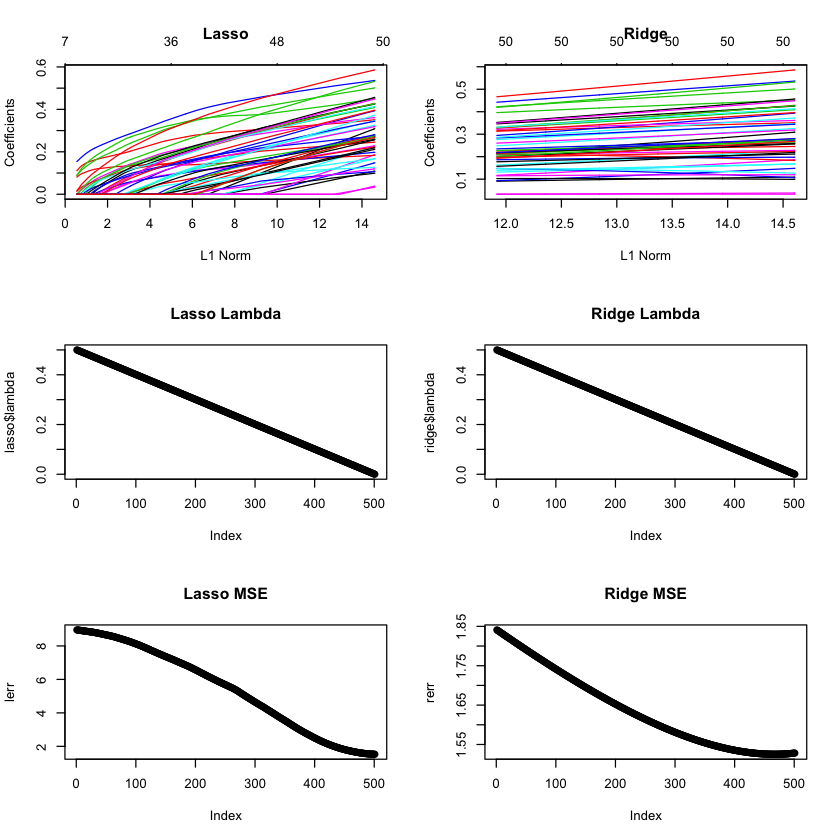

In [3]:
# generating test data
set.seed(321)
X_test = rmvnorm(N, mean = rep(mu, p), sigma = covmat)
eps = rnorm(N, 0, 1^0.5)
Y_test = X_test %*% beta + eps
#Y_test = sin(X_test %*% beta) + eps
rm(eps)

rfit <- predict(ridge, newx=X_test)
lfit <- predict(lasso, newx=X_test)

#lerr <- apply(lfit, 2, mean((Y_test-lfit)^2))
#rerr <- apply(rfit, 2, mean((Y_test-rfit)^2))
lerr <- c(rep(NaN, ncol(lfit)))
rerr <- c(rep(NaN, ncol(rfit)))
for (i in 1:ncol(lfit)){
  lerr[i] <- mean((Y_test-lfit[,i])^2)
  rerr[i] <- mean((Y_test-rfit[,i])^2)
  }

par(mfrow=c(3,2))
plot(lasso, main="Lasso")
plot(ridge, main="Ridge")
plot(lasso$lambda, main="Lasso Lambda")
plot(ridge$lambda, main="Ridge Lambda")
plot(lerr, main="Lasso MSE")
plot(rerr, main="Ridge MSE")

c) Choose the optimal λ using the build in cross-validation function from glmnet and calculate the mean
squared test error drawing a new test data set and compare Ridge regression, Lasso and OLS.

In [4]:
# set s = optimal lambda to optimize cross-validation
cvridge <- cv.glmnet(X, Y, alpha = 0, lambda = grid)
cvlasso <- cv.glmnet(X, Y, alpha=1, lambda = grid)

opt_rlambda <- cvridge$lambda.min
opt_llambda <- cvlasso$lambda.min
cvrfit <- predict(cvridge, s = opt_rlambda, newx = X_test)
cvlfit <- predict(cvlasso, s = opt_llambda, newx = X_test)

cvlerr <- mean((Y_test-cvlfit)^2)
cvrerr <- mean((Y_test-cvrfit)^2)

paste("CV - MSE Ridge Regression is:", format(cvrerr, digit=4))
paste("CV - MSE Lasso Regression is:", format(cvlerr, digit=4))
paste("Difference between Ridge and Lasso is:", format((cvrerr-cvlerr), digit=4))
# Note: since our optimal lambda is zero in the Lasso, we compute simply OLS

[1] "CV - MSE Ridge Regression is: 1.527"

[1] "CV - MSE Lasso Regression is: 1.532"

[1] "Difference between Ridge and Lasso is: -0.005703"

**Simulation Study**
Evaluate the difference in prediction performance of the lasso and ridge regression and OLS by

a) increasing the number of predictors (generated by the same rules as outlined above)

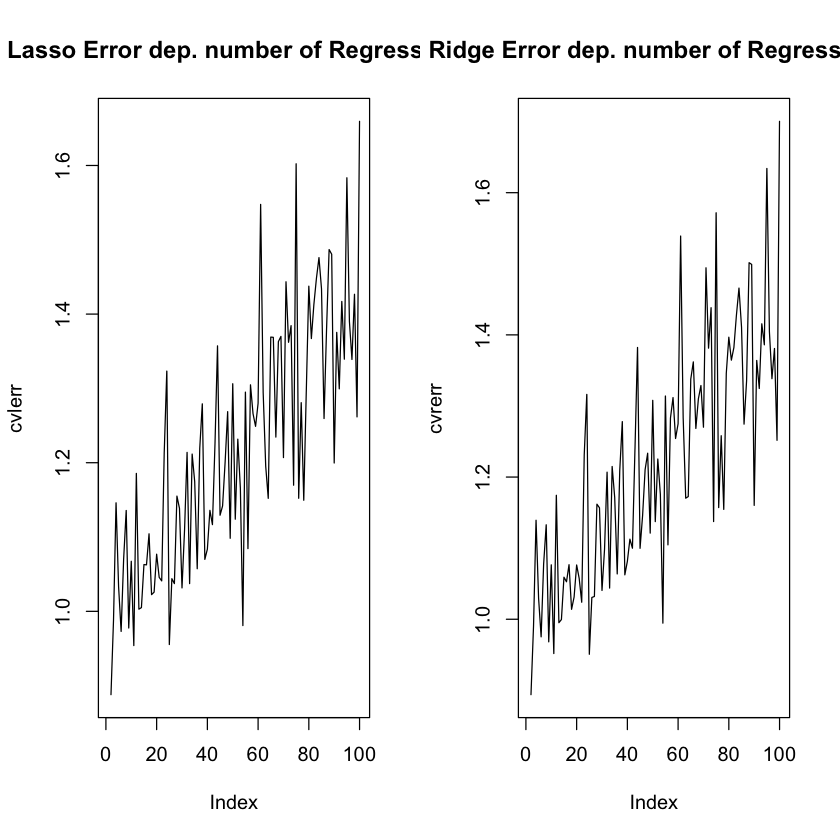

In [5]:
rm(list=ls())
cat("\014")

MCN=100
cvlerr <- c(rep(NaN, MCN))
cvrerr <- c(rep(NaN, MCN))
set.seed(123)

 for (i in 2:MCN){
   # data config
   N = 300
   p = i
   mu = 0

   ## DGP
   # Variance-Covariance Matrix, beta vector
   temp=runif(p, min = 1, max = 2)
   covmat=diag(temp)
   beta=runif(p, min = 0.1, max = 0.5)

   # sampling data and generate y's
   # X = replicate(p , rmvnorm(n = N, mu = mu, Sigma = covmat))
   X = rmvnorm(N, mean = rep(mu, p), sigma = covmat)
   eps = rnorm(N, 0, 1^0.5)
   Y = X %*% beta + eps
   rm(temp, eps)
   cvridge <- cv.glmnet(X, Y, alpha = 0)
   cvlasso <- cv.glmnet(X, Y, alpha=1)

   X_test = rmvnorm(N, mean = rep(mu, p), sigma = covmat)
   eps = rnorm(N, 0, 1^0.5)
   Y_test = X_test %*% beta + eps
   rm(eps)

   opt_rlambda <- cvridge$lambda.min
   opt_llambda <- cvlasso$lambda.min
   cvrfit <- predict(cvridge, s = opt_rlambda, newx = X_test)
   cvlfit <- predict(cvlasso, s = opt_llambda, newx = X_test)

   cvlerr[i] <- mean((Y_test-cvlfit)^2)
   cvrerr[i] <- mean((Y_test-cvrfit)^2)
 }

par(mfrow=c(1,2))
plot(cvlerr, type="l", main="Lasso Error dep. number of Regressors")
plot(cvrerr, type="l", main="Ridge Error dep. number of Regressors")

### Note: Since we increase the number of regressors in the true model, we loose many degrees of freedom.
#         Hence, our estimation becomes less precise!

b) increasing the degree of sparsity in β (while keeping the number of predictors fixed).

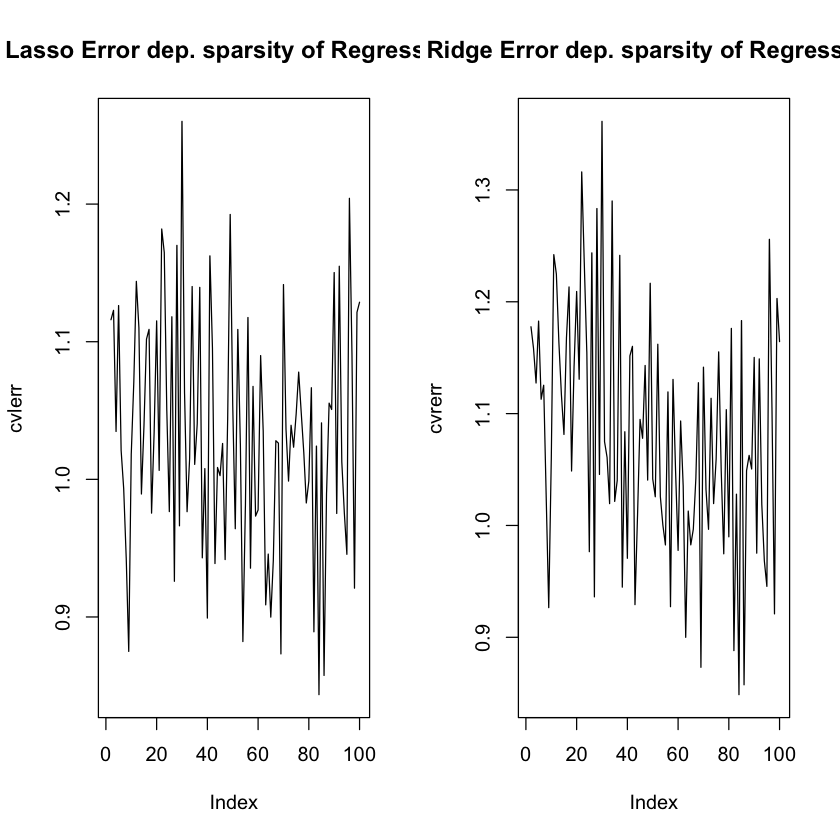

In [6]:
rm(list=ls())
cat("\014")

MCN=100
cvlerr <- c(rep(NaN, MCN))
cvrerr <- c(rep(NaN, MCN))
set.seed(123)

for (i in 2:MCN){
  # data config
  N = 300
  p = 50
  mu = 0

  ## DGP
  # Variance-Covariance Matrix, beta vector
  temp=runif(p, min = 1, max = 2)
  covmat=diag(temp)
  beta=runif(p, min = 0.1, max = 0.5)
  prob=i/(i^2)
  binvec=rbinom(p,1,prob)
  beta=beta*binvec

  # sampling data and generate y's
  # X = replicate(p , rmvnorm(n = N, mu = mu, Sigma = covmat))
  X = rmvnorm(N, mean = rep(mu, p), sigma = covmat)
  eps = rnorm(N, 0, 1^0.5)
  Y = X %*% beta + eps
  rm(temp, eps)
  cvridge <- cv.glmnet(X, Y, alpha = 0)
  cvlasso <- cv.glmnet(X, Y, alpha=1)

  X_test = rmvnorm(N, mean = rep(mu, p), sigma = covmat)
  eps = rnorm(N, 0, 1^0.5)
  Y_test = X_test %*% beta + eps
  rm(eps)

  opt_rlambda <- cvridge$lambda.min
  opt_llambda <- cvlasso$lambda.min
  cvrfit <- predict(cvridge, s = opt_rlambda, newx = X_test)
  cvlfit <- predict(cvlasso, s = opt_llambda, newx = X_test)

  cvlerr[i] <- mean((Y_test-cvlfit)^2)
  cvrerr[i] <- mean((Y_test-cvrfit)^2)
}

par(mfrow=c(1,2))
plot(cvlerr, type="l", main="Lasso Error dep. sparsity of Regressors")
plot(cvrerr, type="l", main="Ridge Error dep. sparsity of Regressors")

### Note: since we increase the sparsity of beta, our true model contains more coefficients which are truely zero.
#         Therefore Lasso performs better, since lasso allows estimates to be zero!

Propose another parameter which we can vary for which it would be interesting to evaluate the relative performance of these three methods.

### The aim of this Exercise: compare PCR, Least Squares and Ridge Regression.

Consider the following data generating process in which we have n observations and $p$ covariates. Initially
set the number of predictors $p = 2$ and $X \sim N_p(0, \Sigma)$. The true coefficients range from $\beta \in [0.1,0.5]$ (you
can sample values from that range or use equi-spaced values on that interval) and the errors are drawn from a
normal distribution $\epsilon \sim N(0,1)$: $\Sigma$ is diagonal and contains the covariates are all standard normal.

In [6]:
# clearing workspace and set wd
rm(list=ls())

library(mvtnorm)   # random draws from a multivariate normal distr.
library(glmnet)     # Lasso and Ridge regression
# Note: packages above require the data to be saved as a data frame

# data config
N = 300
p = 2
mu = 0

## DGP
# Variance-Covariance Matrix, beta vector
set.seed(123)
temp=abs(rnorm(p, 0, 1^0.5))
covmat=diag(temp)
beta=runif(p, min = 0.1, max = 0.5)

# sampling data and generate y's
X = rmvnorm(N, mean = rep(mu, p), sigma = covmat)
eps = rnorm(N, 0, 1^0.5)
Y = X %*% beta + eps
rm(temp, eps)

a) Calculate the principal components using the eigenvector methodology outlined in class and convince
yourself that the function prcomp returns the same numerical transformations that we obtain by hand.

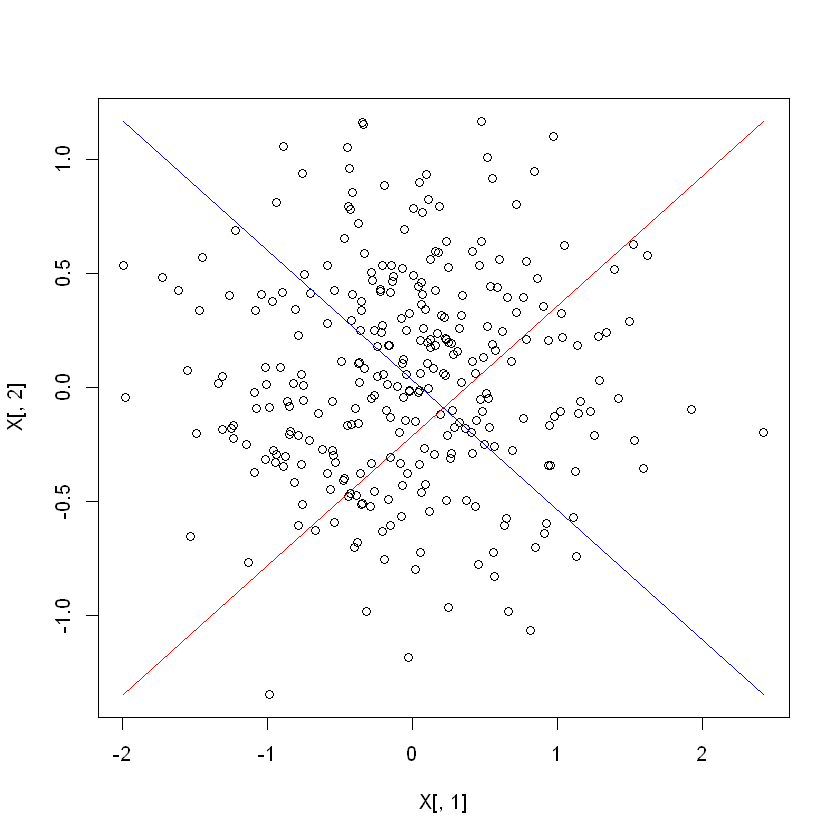

[1] 0


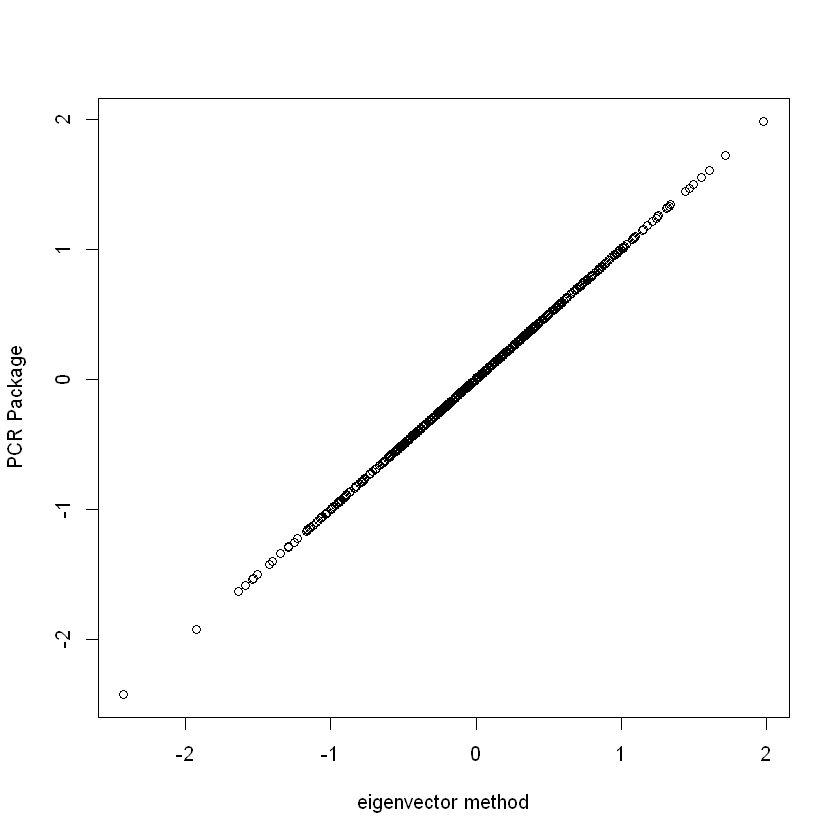

In [7]:
X_m  = (X-colMeans(X))
covx = cov(X_m)
phi  = eigen(covx)
ev   = phi$vectors
ev1  = phi$vectors[,1]    # first eigenvector for PCR-comp 1
ev2  = phi$vectors[,2]    # second eigenvector for PCR-comp 2

plot(X[,1],X[,2])
par(new=TRUE)
plot(ev1, type="l", col="red", axes=FALSE, ylab="", xlab="")
par(new=TRUE)
plot(ev2, type="l", col="blue", axes=FALSE, ylab="", xlab="")
# Why are these eigenvectors not orthogonal?
Z   = X%*%ev
Z1  = Z[,1]
Z2  = Z[,2]

# PCA package in R
pca = prcomp(X)$rotation
ZT  = X%*%pca

# compare eigenvector vs package
plot(Z,ZT, xlab="eigenvector method", ylab="PCR Package")
error = sum(abs(ZT-Z)>0.01)
print(error)

b) Perform PCR using the transformed data and compare test errors using an independent test set with
ordinary least squares and ridge regression (use cross-validation to chose $\lambda$).

[1] "OLS Test-error: 1.249"

[1] "PCR one direction Test-error: 1.252"

[1] "PCR both directions / true model Test-error: 1.249"

[1] "Ridge Test-error: 1.009"

[1] "Ridge regression performs the best!"

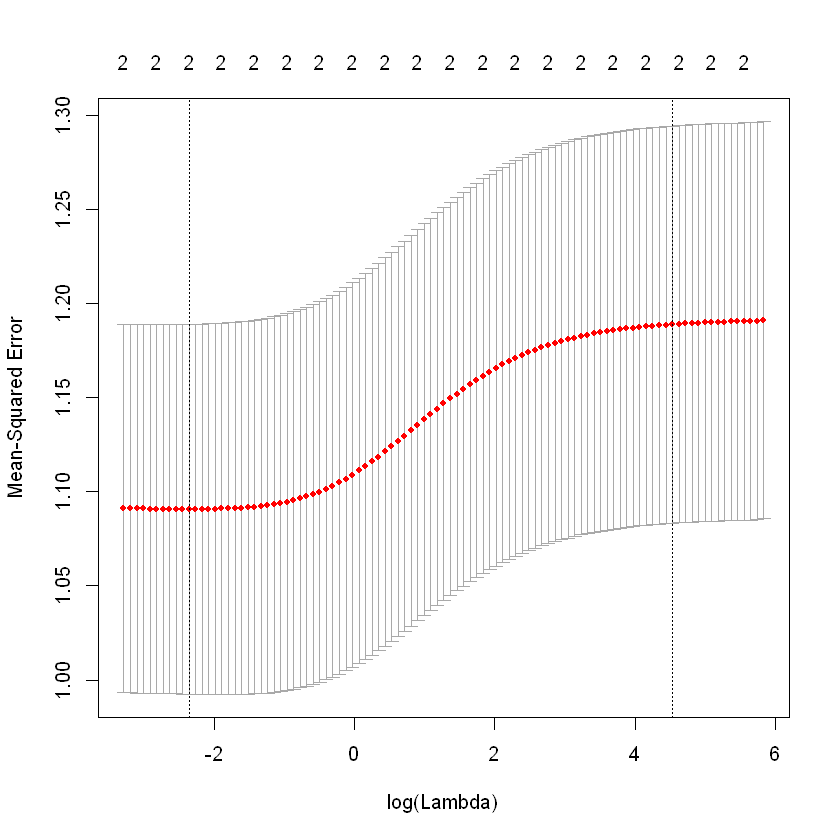

In [8]:
# draw test data
X_test= rmvnorm(N, mean = rep(mu, p), sigma = covmat)
eps_test= eps=rnorm(N,0,1)
Y_test= X_test %*% beta + eps_test
X_test_d=data.frame(X_test) #predict functions need dataframe, but the one
Y_test_d=data.frame(Y_test) #for ridge does not

# perform PCR on Z1 and then Z1+Z2
PCR1=lm(Y ~ Z1)
PCR1_predict=data.frame(predict(PCR1, newdata = X_test_d))
Test_error_PCR1=(1/N)*sum((Y_test-PCR1_predict)^2)

PCR2=lm(Y ~ Z1 + Z2)
PCR2_predict=data.frame(predict(PCR2, newdata = X_test_d))
Test_error_PCR2=(1/N)*sum((Y_test-PCR2_predict)^2)

#Ridge
library(glmnet)
grid = 10^seq(10,-2, length =100)
ridge.mod = glmnet(X,Y,alpha=0, lambda=grid)

set.seed(1)
cv.out=cv.glmnet(X,Y,alpha=0)
plot(cv.out)
bestlam =cv.out$lambda.min
ridge.pred=predict(ridge.mod ,s=bestlam ,newx=X_test)
Test_error_ridge=(1/N)*sum((ridge.pred - Y_test)^2)

#OLS
OLS=lm(Y ~ X)
OLS_predict=data.frame(predict(OLS, newdata = X_test_d))
Test_error_OLS=(1/N)*sum((Y_test-OLS_predict)^2)

paste("OLS Test-error:", format(Test_error_OLS, digit=4))
paste("PCR one direction Test-error:", format(Test_error_PCR1, digit=4))
paste("PCR both directions / true model Test-error:", format(Test_error_PCR2, digit=4))
paste("Ridge Test-error:", format(Test_error_ridge, digit=4))
paste("Ridge regression performs the best!")

Extend the framework described above and (initially) set $p = 50$. 

Propose a data generating process that:

• is most suited for PCA.

• is most suited for Ridge Regression.

• gives the best chance for Least Squares to compete.

Explain the reasoning behind your choices and compare test errors across these three different methods to check
your intuition.

Warning message in plot.window(...):
""axis" ist kein Grafikparameter"Warning message in plot.xy(xy, type, ...):
""axis" ist kein Grafikparameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""axis" ist kein Grafikparameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""axis" ist kein Grafikparameter"Warning message in box(...):
""axis" ist kein Grafikparameter"Warning message in title(...):
""axis" ist kein Grafikparameter"Warning message in plot.window(...):
""axis" ist kein Grafikparameter"Warning message in plot.xy(xy, type, ...):
""axis" ist kein Grafikparameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""axis" ist kein Grafikparameter"Warning message in axis(side = side, at = at, labels = labels, ...):
""axis" ist kein Grafikparameter"Warning message in box(...):
""axis" ist kein Grafikparameter"Warning message in title(...):
""axis" ist kein Grafikparameter"Warning message in plot.window(...):
""axis" ist

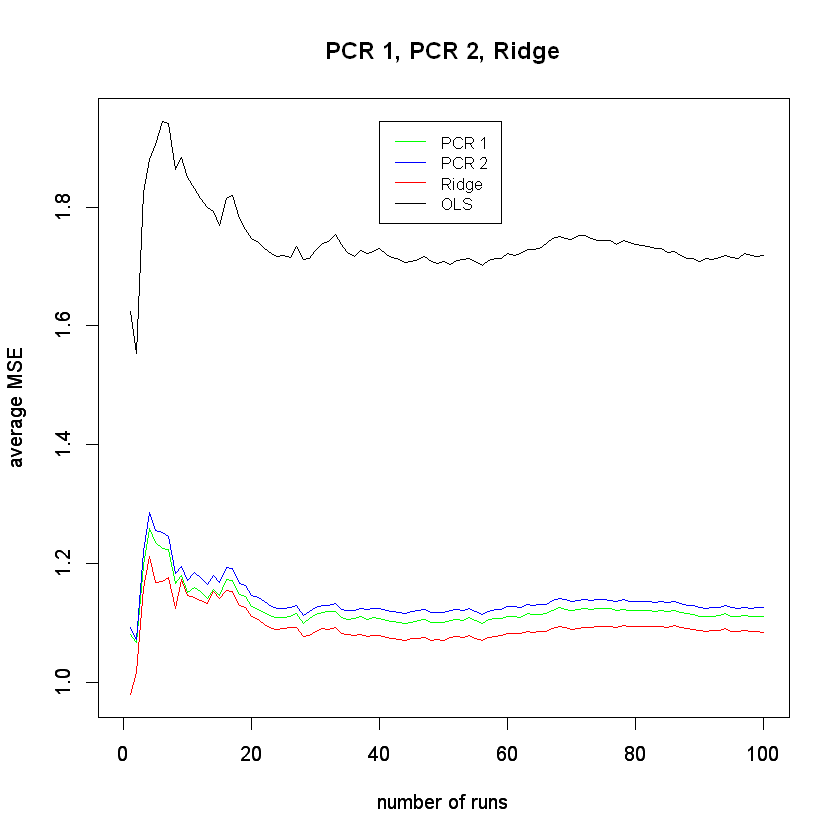

In [9]:
### Simulation Study to check different methods given a certain DGP process
# clear space
rm(list=ls())
library(mvtnorm)   # random draws from a multivariate normal distr.
library(glmnet)     # Lasso and Ridge regression

######################################################################
n=100
p=50
mu=0
beta=runif(p, min=0.01, max=0.99)

MCN=100
MSE=matrix(NaN,4,MCN)

# Note: the to check different specifications of the DGP check out
#       the "covmat" comments in the MCN Loop
######################################################################


for (i in 1:MCN){

  #generate training set

  ######################################################################
  beta=runif(p, min=0.1, max=0.5)
  beta[2:p]=0
  #a=runif(1,min=-0.0,max=0.0)
  #covmat=matrix(c(1,a,a,2),2,2)
  temp=runif(p, min = 0.5, max = 1.5)
  covmat=diag(temp)
  #covmat[1:p,1:p]=1
  #covmat=matrix(runif(p*p,min=0.5,max=0.9),p)
  #covmat=forceSymmetric(covmat)
  #covmat=matrix(covmat@x,p)
  #covmat[1,1]=10

  ######################################################################
  eps=rnorm(n,0,1)
  X = rmvnorm(n, mean = rep(mu, p), sigma = covmat)
  Y = X %*% beta + eps

  #generate test set
  X_test= rmvnorm(n, mean = rep(mu, p), sigma = covmat)
  eps_test= eps=rnorm(n,0,1)
  Y_test= X_test %*% beta + eps_test
  X_test_d=data.frame(X_test)
  Y_test_d=data.frame(Y_test)

  #calculate Z using PCA
  q=prcomp(X)$rotation
  Z=X%*%q
  Z1=Z[,1]
  Z2=Z[,2]

  #do PCR
  PCR1=lm(Y ~ Z1)
  PCR1_predict=data.frame(predict(PCR1, newdata = X_test_d))
  Test_error_PCR1=(1/n)*sum((Y_test-PCR1_predict)^2)

  PCR2=lm(Y ~ Z1 + Z2)
  PCR2_predict=data.frame(predict(PCR2, newdata = X_test_d))
  Test_error_PCR2=(1/n)*sum((Y_test-PCR2_predict)^2)

  #Ridge
  ridge.mod = glmnet(X,Y,alpha=0)
  cv.out=cv.glmnet(X,Y,alpha=0)
  bestlam =cv.out$lambda.min
  ridge.pred=predict(ridge.mod ,s=bestlam ,newx=X_test)
  Test_error_ridge=(1/n)*sum((ridge.pred - Y_test)^2)

  #OLS
  OLS=lm(Y ~ X)
  OLS_predict=data.frame(predict(OLS, newdata = X_test_d))
  Test_error_OLS=(1/n)*sum((Y_test-OLS_predict)^2)

  #save results for each run
  MSE[1,i]=Test_error_OLS
  MSE[2,i]=Test_error_PCR1
  MSE[3,i]=Test_error_PCR2
  MSE[4,i]=Test_error_ridge

}
### calculating Training Errors
MSE_ave=matrix(NaN,4,MCN)
for (l in 1:MCN){
  MSE_ave[1,l]=mean(MSE[1,1:(l)])
  MSE_ave[2,l]=mean(MSE[2,1:(l)])
  MSE_ave[3,l]=mean(MSE[3,1:(l)])
  MSE_ave[4,l]=mean(MSE[4,1:(l)])
}
### plotting results from simulation study
plot(MSE_ave[2,],type="l",col="green",ylim=c(min(MSE_ave),max(MSE_ave)),xlim=c(0,100),axis=FALSE,
     main="PCR 1, PCR 2, Ridge",ylab="average MSE", xlab="number of runs")
par(new=TRUE)
plot(MSE_ave[3,],type="l",col="blue",ylim=c(min(MSE_ave),max(MSE_ave)),xlim=c(0,100),axis=FALSE,
     ylab="average MSE", xlab="number of runs")
par(new=TRUE)
plot(MSE_ave[4,],type="l",col="red",ylim=c(min(MSE_ave),max(MSE_ave)),xlim=c(0,100),axis=FALSE,
     ylab="average MSE", xlab="number of runs")
par(new=TRUE)
plot(MSE_ave[1,],type="l",col="black",ylim=c(min(MSE_ave),max(MSE_ave)),xlim=c(0,100),axis=FALSE,
     ylab="average MSE", xlab="number of runs")
legend(40, max(MSE_ave), legend=c("PCR 1", "PCR 2","Ridge", "OLS"),
       col=c("green", "blue","red","black"), lty=1, cex=0.8)